# Workshop de Machine Learning - Dia 1

## 1. Aprendizado Supervisionado - Classificação

Nesta parte prática, analisaremos o dataset [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), um dos datasets mais clássicos para iniciantes.

O nosso intuito com este segmento é mostrar como funciona, na prática, a resolução de um problema de classificação (primeiramente com dados simplificados).

---

### 1.0. Roteiro

Relembrando o que vimos na parte teórica, estes são os passos recomendados para criar um projeto de *machine learning*, porém, pela simplicidade do problema e do dataset, vamos somente citar alguns dos passos:

1. **Analisar o problema geral** - analisar objetivos;
2. **Adquirir os dados** - baixar/montar/separar dataset;
3. **Visualizar dados em busca de insights** - plotar gráficos e fazer pré-análise;
4. **Preparar os dados para os algoritmos de ML** - pré-processamento;
5. **Selecionar um modelo e treiná-lo** - pré-seleção e *cross-validation*;
6. **Otimizar o modelo** - tunar *hiper-parâmetros*;
7. **Apresentar os resultados** - story-telling/predizer/inferir;

---

### 1.1. Analisar o problema geral

O objetivo geral é, a partir de comprimento e largura de pétala e sépala, classificar uma dada flor, predizendo sua espécie:

* *Iris setosa*;
* *Iris versicolor*;
* *Iris virginica*;

---

### 1.2. Adquirir os dados

Vamos adquirir os dados já prontos de um URL, direto do GitHub. Utilizamos a função `pd.read_csv()` do `pandas`, para extrair os dados do URL, utilizar os nomes definidos em `names` e carregar esses dados em um `DataFrame`, objeto de tabela do `pandas`:

In [0]:
import pandas as pd

# URL do dataset no GitHub
url = "https://raw.githubusercontent.com/MateusCichelero/ML_Class/master/iris/iris.csv"

# Nome das features
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

# Definir dataset, lendo do URL e colocando os nomes nas features
dataset = pd.read_csv(url, names = names)

Apenas para fins didáticos, usamos `type()` para verificar qual o formato deste dataset:

In [3]:
# Tipo de dado
type(dataset)

pandas.core.frame.DataFrame

Verificando a dimensão do `dataset` pela propriedade `shape`: 

In [4]:
# Dimensão do dataset
dataset.shape

(150, 5)

Visualização dos primeiros 8 casos do dataset com `head()`para ter uma ideia de como ele é (é possível utilizar o `tail()` também):

In [5]:
# Visualização dos primeiros casos
dataset.head(8)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


Verificando a descrição estatística com o método `describe()`:

In [6]:
# Descrição estatística
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Verificando a distribuição de classes, combinando o `groupby(<feature>)` com `size()`:

In [7]:
# Distribuição das classes (quantas casos pertencem a cada classe)
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

---

### 1.3.  Visualizar dados em busca de insights

Pela simplicidade do dataset, não poderemos extrair muitos insights, porém a visualização ajuda no entendimento do dataset:

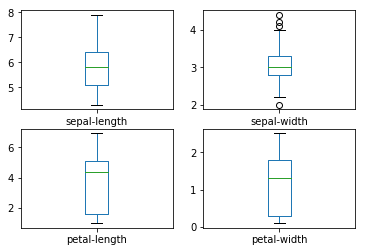

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline #plota grafico na celula a baixo

# box-whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Plotando o histograma com o método `hist()`:

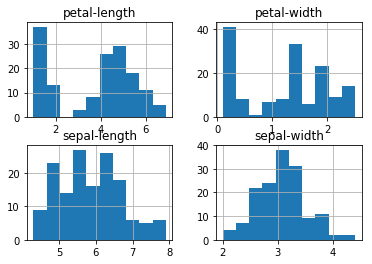

In [9]:
# Histograma
dataset.hist()
plt.show()

Plotando a scatter_matrix com `scatter_matrix()`, importante para visualização da correlação entre variáveis:

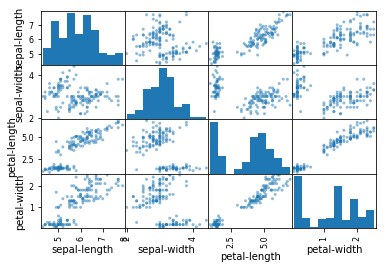

In [10]:
from pandas.plotting import scatter_matrix

# scatter plot matrix
scatter_matrix(dataset)
plt.show()

Separando o dataset entre treinamento e teste, para que possamos avaliar a performance final do nosso modelo final:

In [0]:
from sklearn import model_selection

# Separar dataset de treinamento e de teste
seed = 7  # Fixamos a seed para que os processos aleatórios sejam reprodutíveis

array = dataset.values
X = array[:,0:4]  # Valores numéricos (features)
Y = array[:,4]  # Classes (target)
validation_size = 0.20  # 20% do dataset será de teste

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

---

### 1.4. Preparar os dados para os algoritmos de ML

Pela simplicidade do dataset, pularemos essa parte, pois os dados já estão todos limpos.

---

### 1.5. Selecionar um modelo e treiná-lo 

Agora vamos utilizar o **K-fold Cross Validation** (sendo K = 10) para testar diversos tipos de modelos em nossos dados de treinamento e selecionar o melhor, baseado em alguma métrica de avaliação.

In [0]:
# Metrica de avaliação
scoring = 'accuracy'  # Accuracy = número de predições corretas / número total de predições

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Construção lista de modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

In [16]:
from sklearn.model_selection import cross_val_score #metrica:  k-cross validation

# Avaliação dos modelos

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
SVM: 0.991667 (0.025000)


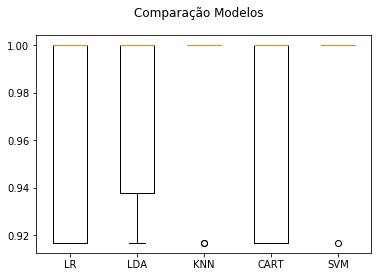

In [17]:
# Compara Modelos

fig = plt.figure()
fig.suptitle('Comparação Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 1.6. Otimizar modelo

Como primeiro exemplo, vamos pular esta seção (será abordada na segunda prática).

### 1.7. Apresentar os resultados

A partir do nosso modelo ter sido escolhido, vamos treiná-lo nos dados de treinamento e criar predições para os dados de teste, com o intuito de validar a performance do nosso modelo em dados novos, simulando um ambiente de produção.



In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix


svm = SVC(gamma='auto')  # Definição do modelo
svm.fit(X_train, Y_train)  # Treinamento (adequar os pesos internos do modelo aos dados)
predictions = svm.predict(X_test)  # Predições nos dados de teste
print(accuracy_score(Y_test, predictions))  # Validação da acurácia entre predições de teste e os valores reais de teste
print(confusion_matrix(Y_test, predictions))  # Matriz confusão

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]


In [20]:
svm.predict([[5.1,3.5,1.7,0.2]])

array(['Iris-setosa'], dtype=object)

Então, podemos trazer como resultados:

* Modelo preditivo que possui uma performance indicada pela acurácia;
* Inferências retiradas das matrizes de correlação;
* Gráficos;

Os próximos passos seriam:

* Melhorar esse modelo com novas informações/métodos mais avançados de pré-processamento (evitar confusões com a confusion matrix);
* Publicar a análise, com story-telling, no Medium/GitHub;

--- 

## 2. Aprendizado Supervisionado - Regressão

Neste outro segmento, analisaremos o dataset *California Housing Prices*, que agrega os valores do mercado imobiliário do estado da Califórnia (EUA).

O nosso intuito com essa aula é explorar todo o *workflow* de um projeto de análise estatística com *machine learning*, desta vez com o foco em modelos de *regressão*.


---


### 2.0. Roteiro

Relembrando os passos recomendados para criar um projeto de *machine learning*:

1. **Analisar o problema geral** - analisar objetivos;
2. **Adquirir os dados** - baixar/montar/separar dataset;
3. **Visualizar dados em busca de insights** - plotar gráficos e fazer pré-análise;
4. **Preparar os dados para os algoritmos de ML** - pré-processamento;
5. **Selecionar um modelo e treiná-lo** - pré-seleção e *cross-validation*;
6. **Otimizar o modelo** - tunar *hiper-parâmetros*;
7. **Apresentar os resultados** - story-telling/predizer/inferir;


---


### 2.1. Analisar o problema geral

Para fins didáticos, imagine que você foi contratado por uma imobiliária da Califórnia para analisar os preços do mercado imobiliário da região e **deve criar um sistema que prediz a  média do preço dos imóveis em qualquer distrito**, dadas outras métricas.

Agora seria um bom momento para fazer perguntas ao seu chefe sobre a **lógica do negócio**, como:
* Quão preciso deve ser o sistema?
* Como a empresa vai utilizar esse sistema?
* O quão *interpretável** deve ser esse modelo?
* Já é utilizada uma solução parecida?
* É possível criar esse sistema sem Machine Learning?
* Existem pessoas que possam dizer quais são as métricas mais usadas por um especialista humano?

*Interpretabilidade significa quanta inferência pode ser tirada do modelo (quanto mais simples, mais interpretável)

Todos estes dados podem ajudar na hora de arquitetar o seu modelo.

Além disso, é importante se perguntar sobre a parte de **machine learning**:
* Qual tipo de aprendizado é esse?
* Quais são os possíveis modelos a serem treinados?
* Qual métrica devemos utilizar para avaliar a performance?

---


### 2.2. Adquirir os dados

Vamos adquirir os dados já prontos de um URL, comprimidos em um tgz. Criamos então uma função para extrair o dataset:

In [0]:
# Importando bibliotecas para criar função para adquirir os dados

import os
import tarfile
from six.moves import urllib


url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'

path = 'datasets/housing'  # Diretório para o qual extrairemos os dados

def fetch_data(url=url, path=path):
    # Caso a pasta path ainda não exista, cria
    if not os.path.isdir(path):
        os.makedirs(path)
        
    tgz_path = os.path.join(path, 'housing.tgz')  # Define novo caminho para os dados
    urllib.request.urlretrieve(url, tgz_path)  # Faz requisição para baixar os dados no caminho definido
    housing_tgz = tarfile.open(tgz_path)  # Abre arquivo .tgz
    housing_tgz.extractall(path=path)  # Extrai conteúdos no diretório path
    housing_tgz.close()  # Fecha arquivo
    
fetch_data()

Agora com os dados extraídos em nossa pasta, abriremos o .csv com o Pandas, para podermos transformar os dados num *DataFrame* (formato do Pandas para datasets, que facilita manipulação):

In [0]:
import pandas as pd

housing = pd.read_csv(path + '/' + 'housing.csv')

#### Extraindo informações úteis

Para observar quais atributos temos no nosso *DataFrame*, seria importante ver as primeiras observações do datase, utilizando o comando `DataFrame.head()`:

In [28]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Outro método importante seria o `DataFrame.info()`, para sabermos o número de observações e tipo de cada coluna:

In [30]:
housing.shape


(20640, 10)

In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


É possível ver que um dos atributos tem dados faltando, evidenciado pelo número menor de valores não nulos (`non-null`).

Para features categóricas, é importante ver a distribuição de classes, para evitar que algumas classes sejam menos representadas no treinamento (e assim, sejam desconsideradas).

Para isso, usamos o `DataFrame["attribute"].value_counts()`, que mostra a contagem dos valores para cada classe:

In [29]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Outra parte importante é ver a descrição estatística do dataset, usando o `DataFrame.describe()`:

In [31]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Plotando histogramas

Outro modo de extrair informações rapidamente do dataset é por meio de *histogramas* para os valores numéricos, usando o `DataFrame.hist()` (são sugeridos como parâmetros `bins=50, figsize=(20,15)`):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb64d6d160>,
      dtype=object)

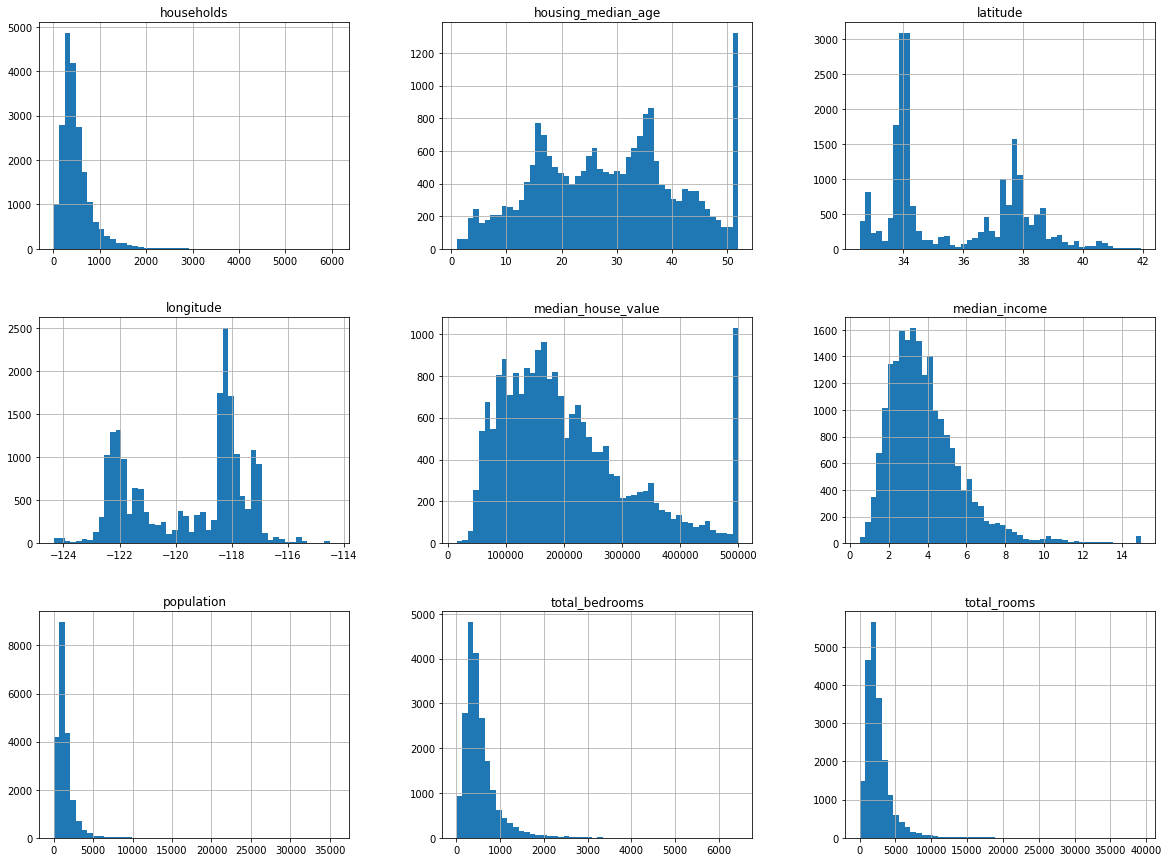

In [32]:
# Em Notebooks, faz com que o plot seja feito na célula
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(20,15))

Algumas observações possíveis desses histogramas:
* Existem grandes valores no fim do histograma de `housing_median_age` e `median_house_value`;
* Os valores de cada feature tem escalas bem diferentes;
* As distribuições não seguem a normal (dificultando alguns modelos);

#### Dividindo o dataset entre Train e Test

Vamos dividir o dataset para avaliarmos nossos resultados após o treinamento. Para isso, utilizaremos uma função pronta `sklearn.model_selection.train_test_split`, que divide aleatoriamente os dados.

É importante passar a ela os argumentos `arrays`, `test_size` e `random_state`, para reprodutibilidade.

É recomendado usar `test_size = 0.2`.

In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)



---

### 2.3. Visualizar os dados em busca de insights

Primeiramente, vamos definir o novo `housing` como uma cópia de `train_set` usando o `DataFrame.copy()`. Isso porque nosso `test_set` deve ser ignorado até o final do processo, utilizado somente na validação (como se fossem as nossas novas observações).

In [0]:
housing = train_set.copy()

In [36]:
housing.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
17848,-121.86,37.42,20.0,5032.0,808.0,2695.0,801.0,6.6227,264800.0,<1H OCEAN
6252,-117.97,34.04,28.0,1686.0,417.0,1355.0,388.0,2.5192,157300.0,<1H OCEAN
9389,-122.53,37.91,37.0,2524.0,398.0,999.0,417.0,7.9892,500001.0,NEAR BAY


#### Visualização geográfica

Vamos explorar nosso `train_set` graficamente, primeiramente plotando em função de latitude e longitude, com `DataFrame.plot(kind='scatter', ...):

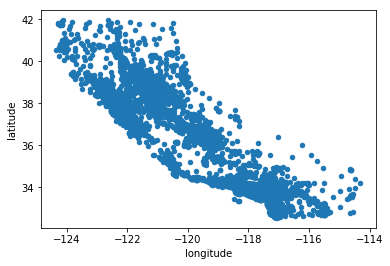

In [35]:
housing.plot(kind='scatter', x='longitude', y='latitude')

Vamos tentar usar o mesmo código acima, mas agora colocando uma transparência nos pontos com o argumento `alpha`, para que possamos ver as regiões mais densas:

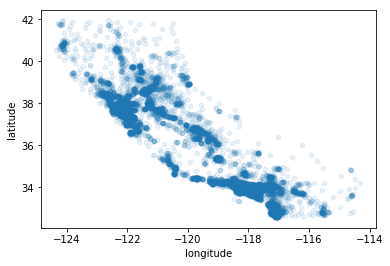

In [37]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

MatPlotLib avançado foge do escopo deste curso, mas abaixo há um exemplo mais complexo de visualização possível:

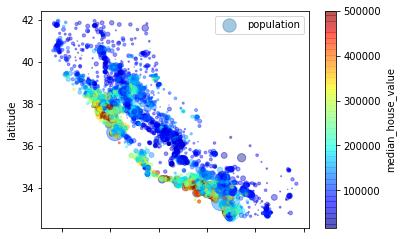

In [38]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

#### A Matriz de Correlação

Agora vamos visualizar a matriz de correlação, para analisar a influência (correlação) de cada feature em nosso target (`median_house_value`).

Primeiro, utilizamos o comando `DataFrame.corr()` para definir a matriz:

In [40]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


Vamos então ver somente a coluna do nosso target, para ver a correlação entre o target e as restantes das features. Utilizaremos o `sort_values(ascending=False)` para termos os as features na ordem decrescente de correlação:

In [41]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

Para visualizar melhor essa *matriz de correlação*, utilizaremos o `pandas.tools.plotting.scatter_matrix` para criar uma matriz de gráficos.

Por termos 11 colunas no nosso dataset, seria improdutivo plotar 11² = 121 gráficos. Portanto, vamos observar apenas os atributos mais promissores (baseados nos melhores valores de correlação):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb5fb13860>,
      dtype=object)

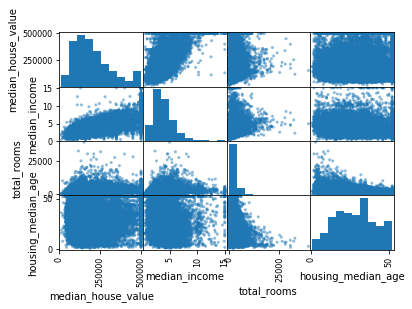

In [42]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']])

A partir desses dados, mais adiante selecionaremos quais features usar em nosso treinamento.

### 2.4. Preparar os dados para os algoritmos de ML

Vamos agora fazer os pré-processamentos necessários para preparar os dados para os algoritmos de *machine learning*.

Primeiro, faremos uma cópia nova do `train_set`, agora dividindo entre `housing` e `housing_label`, já que algumas transformações não se aplicam às features e ao target necessariamente.

Utilizaremos o `DataFrame.drop("target", axis=1)` eliminar o target do nosso dataset de features.

Obs: o método `drop()` não afeta o `DataFrame` original, apenas cria uma cópia.

In [0]:
housing_label = train_set['median_house_value'].copy()
housing = train_set.drop("median_house_value", axis=1)

#### Automatizando o processo com Transformation Pipelines

Algumas transformações são necessárias para o pré-processamento de dados, em uma ordem correta.

No `Scikit-Learn`, temos a class de de `Pipeline`, que  agregam sequências de transformações.

Então, ao chamar o método de `Pipeline.fit_transform(data)`, o `Pipeline` realiza todas as transformações em sequência, facilitando e automatizando o pré-processamento.

Vamos usar o `sklearn.pipeline.Pipeline`, juntamente com outros métodos de pré-processamento.

**Alguns processos importantes de pré-processamento**:

* **Imputation**: preencher valores vazios (`NaN`s) com algum valor estratégico (média, mediana, etc.)
* **Scaling**: normalizar os valores, para que todas as features tenham as mesmas dimensões (e.g. escala de 0-10 vs. 0-1000) e facilitar o processo de otimização;
* **One Hot Encoding**: transformar classes em variáveis binárias, uma para cada classe, para melhor analisar o impacto de cada classe no `target`.

Usaremos também o `ColumnTransformer`, que decide qual `Pipeline` deve ser usada para quais variáveis.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Imputer
from sklearn.compose import ColumnTransformer

# Definir pipeline numérico
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

# Definir quais os nomes das features numéricas e categóricas
num_attribs = list(housing.drop('ocean_proximity', axis=1))
cat_attribs = ["ocean_proximity"]

# Definir todo o pipeline
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# Preparar dados para treino
housing_prepared = full_pipeline.fit_transform(housing)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### 2.5. Selecionar um modelo e treiná-lo

Agora vamos de fato treinar modelos utilizando nossos dados pré-processados para treinar modelos de Regressão e compará-los.

Seguindo os passos da seção anterior, definimos uma lista de regressores, dos quais escolheremos o melhor (menor RMSE).

In [0]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


models = []
models.append(('LR', LinearRegression()))
models.append(('SGD', SGDRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))

Utilizaremos então do código da aula anterior, um pouco modificado, para avaliar cada modelo usando `cross-validation` (`sklearn.model_selection.cross_val_score`):

In [48]:
from sklearn.model_selection import cross_val_score
import numpy as np

scoring = 'neg_mean_squared_error'

for name, model in models:
	cv_results = cross_val_score(model, housing_prepared, housing_label, cv=5, scoring=scoring)
	results = np.sqrt(-cv_results)
	msg = "%s: %f (%f)" % (name, results.mean(), results.std())
	print(msg)

LR: 68622.535283 (1438.766616)
SGD: 68878.720373 (1418.097551)
DT: 69248.249959 (1297.510999)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

RF: 51897.568876 (910.111874)


A partir disso, podemos escolher o modelo que possui menor MSE (mean squared error - erro quadrático médio).


---

### 2.6. Otimizar modelo

Antes de utilizá o melhor modelo para o treinamento e predição, vamos otimizar os hiper-parâmetros do algoritmo escolhido no passo anterior, para otimizar seus resultados.

#### Grid Search

Uma maneira de otimizar os hiper-parâmetros seria iterar sobre o modelo, testando todas as combinações possíveis de hiper-parâmetros e ver qual é mais eficaz. No entanto, o `scikit-learn` possui uma ferramenta automatizada que realiza esse trabalho, é o `sklearn.model_selection.GridSearchCV`.

O Grid Search utiliza `cross validation` para ver qual é a melhor combinação de hiper-parâmetros, dadas as combinações possíveis passadas ao algoritmo, e para ele, devem ser passados os valores a serem testados, o modelo a ser utilizado, o número de divisões da cross validation (`cv`) e o método de pontuação do modelo (`scoring`).

In [49]:
from sklearn.model_selection import GridSearchCV

# Lista de combinação de parâmetros
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

# Inicializar o modelo
rf_reg = RandomForestRegressor()

# Inicializar o GridSearchCV
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring=scoring)

# Treinar o GridSearchCV aos dados
grid_search.fit(housing_prepared, housing_label)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


Podemos ver quais são os melhores parâmetros, usando o `GridSearchCV.best_estimator_`:


In [50]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


---


### 2.7. Apresentar os resultados

Depois de termos o melhor estimador, podemos usar diretamente o GridSearchCV para predizer os valores do `test_set` e compará-los com os valores reais do `test_set`,  obtendo o quão adequado é o nosso modelo.

Primeiro, usaremos o `GridSearchCV.predict()` nas features do `test_set`, para obtermos nossas predições do `test_set`:

In [51]:
# Passar as features do test_set pelo pipeline
test_prepared = full_pipeline.fit_transform(test_set.drop("median_house_value", axis=1))

# Predizer valores do test_set
predictions = grid_search.predict(test_prepared)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


 Depois, utilizaremos o `sklearn.metrics.mean_squared_error(prediction, real_value)` para avaliar o desempenho das predições contra os valores reais de `test_set`, para obtermos o nosso indicador de performance final.

In [52]:
from sklearn.metrics import mean_squared_error

# Calcular o MSE final
final_mse = mean_squared_error(test_set['median_house_value'], predictions)

# Tirar a raiz do MSE final para chegar no RMSE final
final_rmse = np.sqrt(final_mse)
final_rmse


58914.03033958385

Então, podemos trazer como resultados:
* Modelo preditivo que possui uma performance indicada por desvio padrão;
* Inferências retiradas das matrizes de correlação;
* Gráficos;

Os próximos passos seriam:
* Melhorar esse modelo com novas informações/métodos mais avançados de pré-processamento;
* Implementar o modelo em uma plataforma que automatize o treinamento com novos dados e disponibilize novas predições aos funcionários da empresa;
* Compilar as informações numa apresentação, para apresentar ao seu chefe;
* Publicar a análise, com story-telling, no Medium/GitHub;


---

## Desafio

**Ir ao [Kaggle](https://www.kaggle.com/), escolher um desafio/dataset e realizar a mesma análise que fizemos aqui**.

---


Conteúdo baseado no capítulo 2 (*End-to-End Machine Learning Project*) do livro *Hands-On Machine Learning with Scikit-Learn and TensorFlow*, Aurelien Geron, 2017.